<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/leobergman/LeoBergman_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integration**
**Leo Bergman**

# **Abstract**

In this lab I have tested some numerical methods applied to calculus, in this case integration methods. I tried both exact and approximative methods. More specifically the methods used was Gauss-Legendre and the Montecarlo method. The latter developed by Neumann and others during the Manhattan project.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [4]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Leo Bergman (bergmanleo@gmail.com)
# Template by Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [5]:
# Load neccessary modules.
from google.colab import files
from scipy.sparse import random
import time
import timeit
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import tri, axes
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.sparse as sparse
from scipy import integrate as integr8
from scipy.interpolate import lagrange
import scipy
import numpy as np
from numpy.linalg import inv,norm,solve,lstsq,det
import unittest
from functools import reduce
from numpy.polynomial import polynomial as Poly
import pandas as pd
from sympy import symbols, Eq, solve,integrate


# **Introduction**

I did 2-point and 3-point Gauss. The first one was done over a unit interval while the second over a unit triangle. The 2-point Gauss method is exact when polynomials have a degree of 3 or less. While the 3-point Gauss method over the triangle is exact when both x,y have a degree 2 or less, this since we're dealing with two variables.

In the lab I was also dealing with a monte-carlo integration which is a approximative method but works quite nice with large polynomials when a exact solution is exhausting to compute.

# **Method**

Using Gauss quadrature we can achieve a exact integration method for polynomial integrands equal or less then equal to $n= 2q+1$ using $q+1$ quadrature points. 

Since the Gauss integration method is evaluated at the symmetric interval $\hat{x} \in [-1,1]$ we have to perform a variable change in the range. This is actually the problem $11.3$ in the coursebook. The trick is to go from the symmetric unit interval to a arbitrary interval $x \in [a,b]$

So 
$-1\leq \hat{x} \leq 1 \leftrightarrow a \leq x \leq b $

if the following relationship holds

$\frac{\hat{x}-(-1)}{1-(-1)} = \frac{x-a}{b-a}$
Solving for x we retrieve
$x = \frac{(b-a)(\hat{x}+1)}{2} + a = \frac{b-a}{2}\hat{x} + \frac{a+b}{2}$

with $b = -1$, $a = 1$ 

we have

$x = \frac{(b-a)(\hat{x}+1)}{2} + a = \frac{1}{2}\hat{x} + \frac{1}{2}$
which yields the integral

  $\frac{1}{2} \int^1_{-1}p(\frac{1}{2}\hat{x} + \frac{1}{2})  d\hat{x}$

**First task**

In the first task p is a cubic polynomial
$p(x) = c_0 +c_1 x + c_2 x^2 + c_3 x^3$
we compare the result from above with the exact integral
$\frac{1}{2}\int^b_{a}p(x)dx = [c_0x + \frac{c_1 x^2}{2} +  \frac{c_3x^3}{3} + \frac{c_4x^4}{4}]^b_a$
which is nice since I can reuse the coefficients!

**Second task**

From example 11.5 we have that 

$w_i = \frac{1}{6}$ with $i \in [0,2]$ 

when the triangle is covered by the points (0,1), (1,0) and origo.Using the midpoints of those we get the quadrature points

(0,1/2),(1/2,0),(1/2,1/2)
The Gauss rule approximation is then

$\sum^2_{i=0}p(x_i,y_i)w_i$
with 

$p(x,y) = c_5 y^2 + c_4 x^2 + c_3 xy + c_2 y+c_1x + c_0$

After some trivial calculus operations, we end up with the exact solution which is given by
$\int^1_0 \int^{1-y}_0 p(x,y)dxdy = \frac{c_5+c_4}{12} + \frac{c_3}{24} + \frac{c_1+c_2}{6}+\frac{c_0}{2} $

again, I can reuse the coefficients!

**Third task**
Using montecarlo methods we can approximate a integral over a interval $I \in [a,b]$ for a smooth function by a sum


$\int^b_a f(x)dx \approx \frac{b-a}{n}\sum^n_{i=1}f(x_i)$

with the attribute that

 $lim_{n \rightarrow \infty} \frac{b-a}{n}\sum^n_{i=1}f(x_i) = \int^b_a f(x)dx $

Here $x_i$ is a random point in the interval I and n is then number of quadrature points.

I simulated a wide range of polynomials (50) with random constants. I looked at convergence by looking at the average error for all randomly generated polynomials between the MC-generated integral and the exact integral.

In [6]:
'''Gaussian quadrature over a one-dim interval'''

def gauss1DIntegral(f,a,b,quadraticPoints):
  s = 0
  w = 1
  for x in quadraticPoints:
    s += f(x)*w
  return s

def int1dExact(coeff):
  I = 0
  i = 0
  for c in coeff:
    I =I+ c/(i+1)
    i+=1
  return I

'''Gaussian quadrature over a reference triangle'''

def gauss2dTriangle(f,quadraturePoints,w = 1/6):
  I = 0

  for qp in quadraturePoints:
    I += f(qp[0], qp[1])*w
  return I

def exact2dTriangle(coeff):
  I = (coeff[0]/2) + ((coeff[1]+coeff[2])/6)+ ((coeff[4]+coeff[5])/12) + (coeff[3]/24)
  return I

'''Montecarlo on unit interval'''

def monteCarlo(f, quadpoints):
  I = 0
  for i in range(quadpoints):
    qpRandom = np.random.rand(1)
    I += (f(qpRandom))/quadpoints
  return I



# **Results**

**Proof of correctness**

../usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
.
----------------------------------------------------------------------
Ran 3 tests in 0.427s

OK


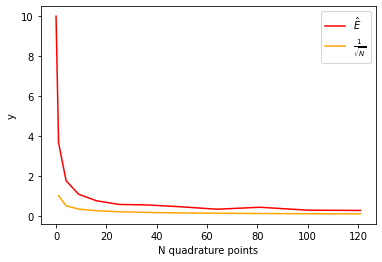

In [7]:

class Test(unittest.TestCase):

  def testGauss1d(self):
    coeff = [random.randrange(0,10) for i in range(4)]
    g = lambda x:  coeff[3]*x**3 +coeff[2]*x**2 + coeff[1]*x + coeff[0]
    a = 0
    b = 1
    quadraticPoints = [1/(np.sqrt(3)), -1/(np.sqrt(3))]
    approx = ((b-a)/2)*gauss1DIntegral(lambda x: g((x+1) * (b-a) * (1/2) + a),a,b,quadraticPoints)
    exact = int1dExact(coeff)
    np.testing.assert_approx_equal(approx,exact,significant=1)

  def testGauss2dTriangle(self):
    coeff = [random.randrange(0,10) for i in range(6)]
    g = lambda x,y: coeff[4]*x**2 +coeff[5]*y**2 +coeff[1]*x+coeff[2]*y+coeff[3]*x*y + coeff[0]
    exact = exact2dTriangle(coeff)
    quadraturePoints = [[0.5, 0], [0, 0.5], [0.5, 0.5]]
    approx = gauss2dTriangle(g,quadraturePoints)
    np.testing.assert_approx_equal(approx,exact,significant=1)

  def testMonteCarlo(self):
    q = [i**2 for i in range(12)]
    num = 50
    q = np.array(q)
    #x = np.linspace(q[0], q[-1], num)
    avgE = np.zeros(q.shape[0])  
    for i in range(num):
      er = np.zeros(q.shape[0])
      coeff = [random.randrange(0,10) for i in range(4)]
      g = lambda x:  coeff[3]*x**3 +coeff[2]*x**2 + coeff[1]*x + coeff[0]
      for j in range(q.shape[0]):
        er[j] = abs(int1dExact(coeff) - monteCarlo(g, q[j]))
      avgE += er
    plt.plot(q, avgE/num, color='red', label='$\hat{E}$')
    plt.plot(q, 1/np.sqrt(q), color='orange', label=r'$\frac{1}{\sqrt{N}}$')
    plt.legend(loc = 'upper right')
    plt.xlabel("N quadrature points")
    plt.ylabel("y")
    
if __name__ == '__main__':
  unittest.main(argv=['first-arg-is-ignored'],exit = False)

**Performance test**

# **Discussion**

I learned about integration in numerical methods in this lab. Previously I mainly used trapezius rules, and Riemann sums in numerical methods. 

I did some experiments with numpy and found that we have different methods whether we integrate over a function or a scalar vector.  Simps seems to be very common in the latter case while Gauss-Legendre or even Gauss-Lobatto seems to be common. When using np.quadrature we use Gaussian quadrature rules. 